In [951]:
import nltk
from sklearn import preprocessing
import pandas as pd
import sklearn
import re  
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
## For Stemming
from nltk.tokenize import sent_tokenize, word_tokenize
import os
from sklearn.model_selection import train_test_split, GridSearchCV
import random as rd
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
## conda install python-graphviz
## restart kernel (click the little red x next to the Console)
import graphviz 
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import LinearSVC
from sklearn.decomposition import PCA
#from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import confusion_matrix

from sklearn.tree import export_graphviz
#from sklearn.externals.six import StringIO  
from IPython.display import Image  
## conda install pydotplus
import pydotplus
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

#from nltk.stem import WordNetLemmatizer 
#LEMMER = WordNetLemmatizer() 

from nltk.stem.porter import PorterStemmer

import string
import numpy as np
import seaborn as sns

In [952]:
df = pd.read_csv("CleanedData.csv", index_col = 0)

In [953]:
df.head(10)

,id,title,original_language,overview,genres,popularity,release_date,vote_average,vote_count,year,belongs_to_collection,budget,production_companies,production_countries,revenue,runtime,score
0,76600,Avatar: The Way of Water,en,Set more than a decade after the events of the...,"['Science Fiction', 'Adventure', 'Action']",329.467,2022-12-14,7.655,9839,2022,Avatar Collection,18000000.0,"['Twentieth Century Fox Film Corporation', 'Li...",['United States of America'],4.288672e+07,108.0,7.62
1,9552,The Exorcist,en,12-year-old Regan MacNeil begins to adapt an e...,['Horror'],114.989,1973-12-26,7.721,7254,1973,The Exorcist Collection,8000000.0,"['Warner Bros.', 'Hoya Productions']",['United States of America'],4.413061e+08,122.0,7.67
2,157336,Interstellar,en,The adventures of a group of explorers who mak...,"['Adventure', 'Drama', 'Science Fiction']",132.297,2014-11-05,8.418,32591,2014,NaN,165000000.0,"['Paramount Pictures', 'Legendary Pictures', '...","['Canada', 'United States of America', 'United...",6.751200e+08,169.0,8.40
3,176,Saw,en,Obsessed with teaching his victims the value o...,"['Horror', 'Mystery', 'Crime']",382.841,2004-10-01,7.400,8344,2004,Saw Collection,1200000.0,"['Lions Gate Films', 'Twisted Pictures', 'Evol...",['United States of America'],1.039117e+08,103.0,7.37
4,671,Harry Potter and the Philosopher's Stone,en,Harry Potter has lived under the stairs at his...,"['Adventure', 'Fantasy']",199.505,2001-11-16,7.916,25390,2001,Harry Potter Collection,125000000.0,"['1492 Pictures', 'Warner Bros.', 'Heyday Films']","['United Kingdom', 'United States of America']",9.764756e+08,152.0,7.90
5,155,The Dark Knight,en,Batman raises the stakes in his war on crime. ...,"['Drama', 'Action', 'Crime', 'Thriller']",110.984,2008-07-16,8.511,30639,2008,The Dark Knight Collection,185000000.0,"['DC Comics', 'Legendary Pictures', 'Warner Br...","['United Kingdom', 'United States of America']",1.004558e+09,152.0,8.49
6,11,Star Wars,en,Princess Leia is captured and held hostage by ...,"['Adventure', 'Action', 'Science Fiction']",91.676,1977-05-25,8.204,19164,1977,Star Wars Collection,11000000.0,"['Lucasfilm', 'Twentieth Century Fox Film Corp...",['United States of America'],7.753980e+08,121.0,8.17
7,19995,Avatar,en,"In the 22nd century, a paraplegic Marine is di...","['Action', 'Adventure', 'Fantasy', 'Science Fi...",104.417,2009-12-15,7.573,29824,2009,Avatar Collection,237000000.0,"['Ingenious Film Partners', 'Twentieth Century...","['United States of America', 'United Kingdom']",2.787965e+09,162.0,7.56
8,603,The Matrix,en,"Set in the 22nd century, The Matrix tells the ...","['Action', 'Science Fiction']",76.635,1999-03-30,8.206,23833,1999,The Matrix Collection,63000000.0,"['Village Roadshow Pictures', 'Groucho II Film...","['Australia', 'United States of America']",4.635174e+08,136.0,8.18
9,948,Halloween,en,Fifteen years after murdering his sister on Ha...,"['Horror', 'Thriller']",75.657,1978-10-24,7.561,4988,1978,Halloween Collection,300000.0,"['Compass International Pictures', 'Falcon Int...",['United States of America'],7.000000e+07,91.0,7.50


<AxesSubplot:xlabel='score', ylabel='Density'>

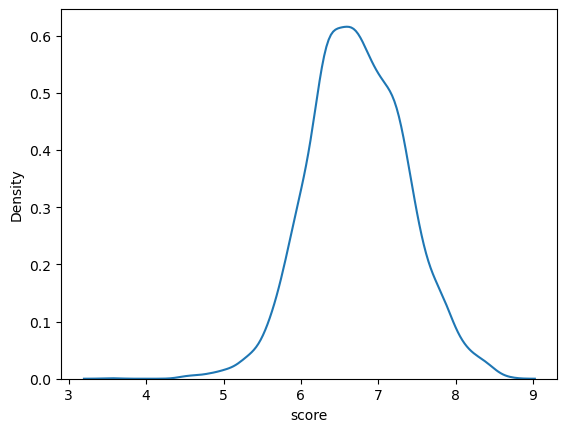

In [954]:
sns.kdeplot(data = df, x = 'score')

In [955]:
df['score'].describe()

count    4127.000000
mean        6.731757
std         0.624493
min         3.550000
25%         6.310000
50%         6.710000
75%         7.160000
max         8.670000
Name: score, dtype: float64

In [956]:
df_num = df[['popularity', 'budget', 'revenue', 'runtime', 'score']]

In [957]:
df_num.head(10)

,popularity,budget,revenue,runtime,score
0,329.467,18000000.0,4.288672e+07,108.0,7.62
1,114.989,8000000.0,4.413061e+08,122.0,7.67
2,132.297,165000000.0,6.751200e+08,169.0,8.40
3,382.841,1200000.0,1.039117e+08,103.0,7.37
4,199.505,125000000.0,9.764756e+08,152.0,7.90
5,110.984,185000000.0,1.004558e+09,152.0,8.49
6,91.676,11000000.0,7.753980e+08,121.0,8.17
7,104.417,237000000.0,2.787965e+09,162.0,7.56
8,76.635,63000000.0,4.635174e+08,136.0,8.18
9,75.657,300000.0,7.000000e+07,91.0,7.50


In [958]:
def normalize(df, columns_to_normalize):
    df_normalized = df.copy()
    
    for column in columns_to_normalize:
        min_value = df[column].min()
        max_value = df[column].max()
        
        df_normalized[column] = (100 * (df[column] - min_value) / (max_value - min_value)).round(2)
    
    return df_normalized

In [959]:
columns_to_normalize = ['popularity', 'budget', 'revenue', 'runtime']

In [960]:
df_normalized = df_num.copy()
df_normalized = normalize(df_normalized, columns_to_normalize)

In [961]:
df_normalized.head(10)

,popularity,budget,revenue,runtime,score
0,86.04,4.74,1.54,33.44,7.62
1,29.93,2.11,15.83,37.90,7.67
2,34.45,43.42,24.22,52.87,8.40
3,100.00,0.32,3.73,31.85,7.37
4,52.04,32.89,35.02,47.45,7.90
5,28.88,48.68,36.03,47.45,8.49
6,23.83,2.89,27.81,37.58,8.17
7,27.16,62.37,100.00,50.64,7.56
8,19.89,16.58,16.63,42.36,8.18
9,19.64,0.08,2.51,28.03,7.50


In [962]:
#Function to create and add Labels in the data:

def add_labels(df):
    df['label'] = df['score'].apply(lambda score: 'Below Average' if score < 6.3 else ('Average' if 6.3 <= score <= 7.3 else 'Above Average'))
    return df

In [963]:
labeled_df = add_labels(df_normalized)

In [964]:
labeled_df.head(10)

,popularity,budget,revenue,runtime,score,label
0,86.04,4.74,1.54,33.44,7.62,Above Average
1,29.93,2.11,15.83,37.90,7.67,Above Average
2,34.45,43.42,24.22,52.87,8.40,Above Average
3,100.00,0.32,3.73,31.85,7.37,Above Average
4,52.04,32.89,35.02,47.45,7.90,Above Average
5,28.88,48.68,36.03,47.45,8.49,Above Average
6,23.83,2.89,27.81,37.58,8.17,Above Average
7,27.16,62.37,100.00,50.64,7.56,Above Average
8,19.89,16.58,16.63,42.36,8.18,Above Average
9,19.64,0.08,2.51,28.03,7.50,Above Average


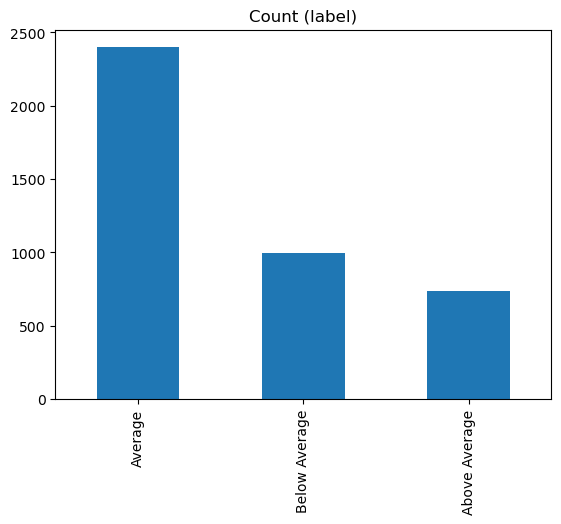

In [965]:
labeled_df.label.value_counts().plot(kind='bar', title='Count (label)');

In [966]:
sampled_df = labeled_df.sample(n=4127, random_state=42)

In [967]:
X = sampled_df.drop(['label', 'score'], axis = 1)
y = sampled_df['label']

In [968]:
# from imblearn.over_sampling import RandomOverSampler

# ros = RandomOverSampler()
# X, y = ros.fit_resample(X, y)

In [969]:
# from imblearn.over_sampling import SMOTE

# smote = SMOTE(sampling_strategy='minority')
# X, y = smote.fit_resample(X, y)

In [970]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [971]:
X_train.head(10)

,popularity,budget,revenue,runtime
2763,5.73,11.32,1.67,33.44
323,13.98,3.42,15.30,34.71
1176,4.87,15.79,2.66,42.36
2979,6.03,6.84,2.36,37.58
690,6.30,11.58,5.57,39.81
275,8.11,21.05,10.04,39.17
303,16.19,48.68,19.33,28.66
1214,3.67,0.79,3.76,32.80
3501,2.65,11.84,1.52,30.57
4843,3.52,4.74,1.54,8.60


In [972]:
X_test.head(10)

,popularity,budget,revenue,runtime
1116,5.84,4.47,4.50,30.89
2378,5.25,3.68,5.77,45.22
3619,3.20,7.89,2.20,36.62
4363,2.93,11.05,1.15,38.54
1268,11.56,35.53,20.99,30.25
546,5.49,0.11,0.18,28.03
5138,2.27,1.32,0.12,29.30
3588,3.87,0.33,1.30,40.13
2919,3.77,4.74,1.54,27.39
3997,3.45,4.74,1.54,27.71


In [973]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

dt = DecisionTreeClassifier(criterion='entropy', ##"entropy" or "gini"
                            splitter='best',  ## or "random" or "best"
                            max_depth=5, 
                            min_samples_split=2, 
                            min_samples_leaf=1)

## perform DT
dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [974]:
TREE_data = tree.export_graphviz(dt, out_file=None,
                  feature_names = X_train.columns,
                  class_names=["Below Average", "Average", "Above Average"],  # Specify class labels
                  filled=True, 
                  rounded=True,  
                  special_characters=True) 
                                   
graph = graphviz.Source(TREE_data)
graph.format = 'png'
graph.render("Tree_Record")

'Tree_Record.png'

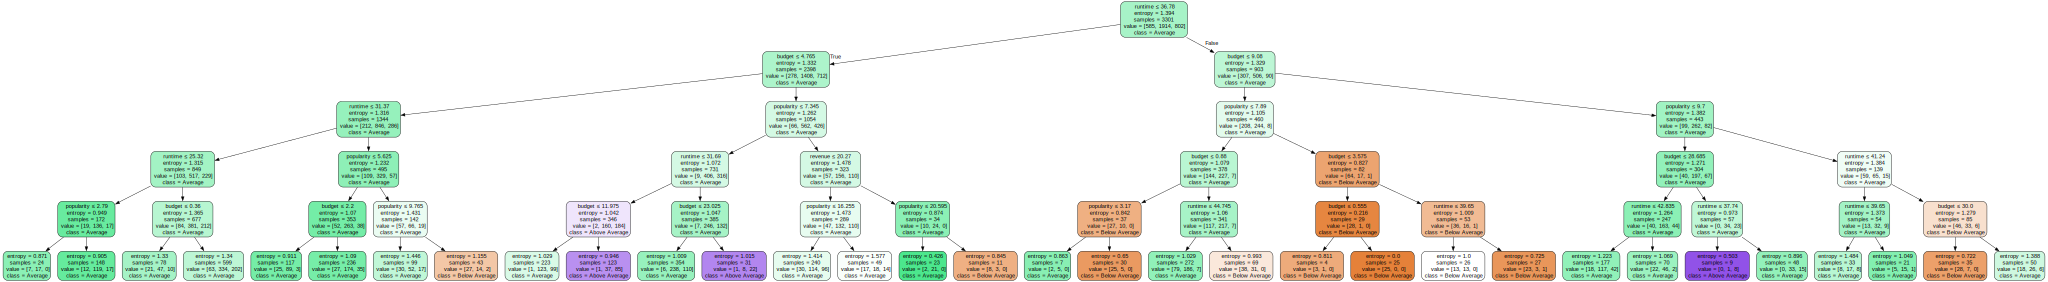

In [975]:
TREE_data = export_graphviz(
    dt,
    out_file=None,
    feature_names=X_train.columns,
    class_names=["Below Average", "Average", "Above Average"],  # Specify class labels
    filled=True,
    rounded=True,
    special_characters=True
)

# Create the graph
graph = graphviz.Source(TREE_data)
graph

In [976]:
y_pred = dt.predict(X_test)

In [977]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

acc = accuracy_score(y_test, y_pred)
print(f"\nThe accurary is: {acc}\n")
    
## Show the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(f"\nThe confusion matrix is:")
print(cm)


The accurary is: 0.6331719128329297


The confusion matrix is:
[[ 38 110   1]
 [ 14 451  20]
 [  3 155  34]]


<Figure size 1800x1500 with 0 Axes>

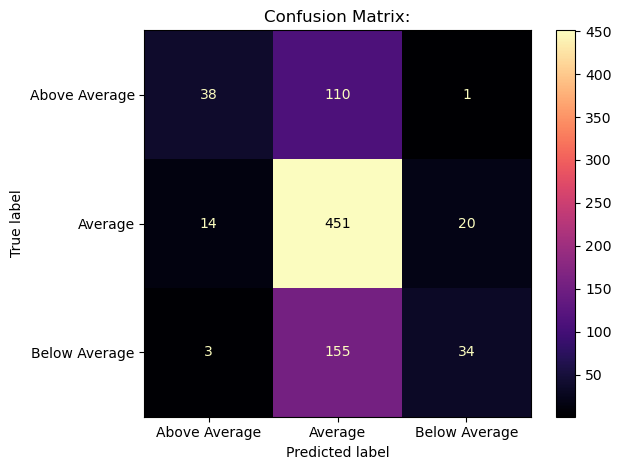

In [978]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt.classes_)
plt.figure(figsize=(18, 15))
disp.plot(cmap='magma')
plt.title("Confusion Matrix:") 
plt.tight_layout()
plt.show()

In [979]:
dt = DecisionTreeClassifier(criterion='gini', ##"entropy" or "gini"
                            splitter='best',  ## or "random" or "best"
                            max_depth=7, 
                            min_samples_split=2, 
                            min_samples_leaf=1)

## perform DT
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7)

In [980]:
TREE_data = tree.export_graphviz(dt, out_file=None,
                  feature_names = X_train.columns,
                  class_names=["Below Average", "Average", "Above Average"],  # Specify class labels
                  filled=True, 
                  rounded=True,  
                  special_characters=True) 
                                   
graph = graphviz.Source(TREE_data)
graph.format = 'png'
graph.render("Tree2")

'Tree2.png'


The accurary is: 0.6101694915254238


The confusion matrix is:
[[ 43  94  12]
 [ 23 381  81]
 [  5 107  80]]


<Figure size 1800x1500 with 0 Axes>

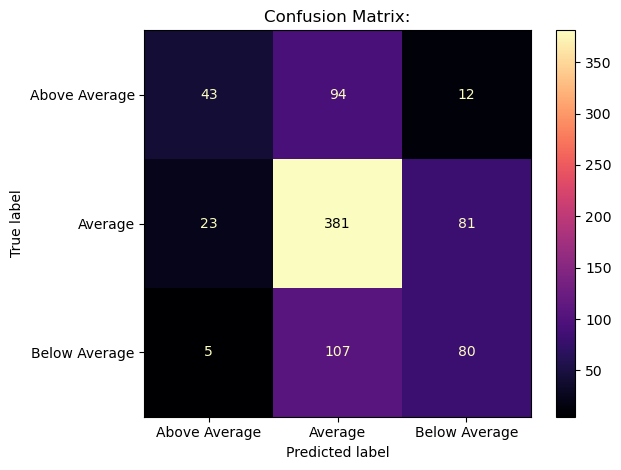

In [981]:
y_pred = dt.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(f"\nThe accurary is: {acc}\n")

cm = confusion_matrix(y_test, y_pred)
print(f"\nThe confusion matrix is:")
print(cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt.classes_)
plt.figure(figsize=(18, 15))
disp.plot(cmap='magma')
plt.title("Confusion Matrix:") 
plt.tight_layout()
plt.show()

In [982]:
dt = DecisionTreeClassifier(criterion='gini', ##"entropy" or "gini"
                            splitter='best',  ## or "random" or "best"
                            max_depth=None, 
                            min_samples_split=2, 
                            min_samples_leaf=1)

## perform DT
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [983]:
TREE_data = tree.export_graphviz(dt, out_file=None,
                  feature_names = X_train.columns,
                  class_names=["Below Average", "Average", "Above Average"],  # Specify class labels
                  filled=True, 
                  rounded=True,  
                  special_characters=True) 
                                   
graph = graphviz.Source(TREE_data)
graph.format = 'png'
graph.render("TreeNone")

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.488462 to fit


'TreeNone.png'


The accurary is: 0.5084745762711864


The confusion matrix is:
[[ 53  81  15]
 [ 73 288 124]
 [ 20  93  79]]


<Figure size 1800x1500 with 0 Axes>

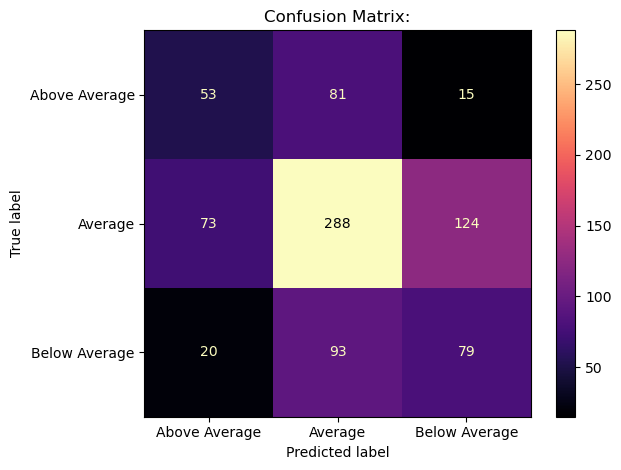

In [984]:
y_pred = dt.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(f"\nThe accurary is: {acc}\n")

cm = confusion_matrix(y_test, y_pred)
print(f"\nThe confusion matrix is:")
print(cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt.classes_)
plt.figure(figsize=(18, 15))
disp.plot(cmap='magma')
plt.title("Confusion Matrix:") 
plt.tight_layout()
plt.show()

# Testing on the train data itself to check the model:


The accurary is: 1.0


The confusion matrix is:
[[ 585    0    0]
 [   0 1914    0]
 [   0    0  802]]


<Figure size 1800x1500 with 0 Axes>

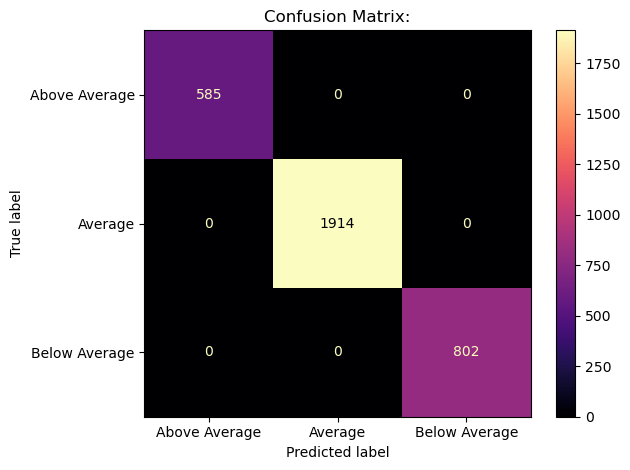

In [985]:
y_pred = dt.predict(X_train)

acc = accuracy_score(y_train, y_pred)
print(f"\nThe accurary is: {acc}\n")

cm = confusion_matrix(y_train, y_pred)
print(f"\nThe confusion matrix is:")
print(cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt.classes_)
plt.figure(figsize=(18, 15))
disp.plot(cmap='magma')
plt.title("Confusion Matrix:") 
plt.tight_layout()
plt.show()

# Searching for best parameters and training the model on them:

In [1002]:
def perform_grid_search(X_train, y_train):
    # Setting up parameter grid for Grid Search
    params = {
        "max_depth": [2, 3, 5],
        "min_samples_leaf": [5, 8, 12, 15],
        "criterion": ['gini', 'entropy']
    }
    
    # Performing Grid Search
    grid_search = GridSearchCV(
        estimator=DecisionTreeClassifier(random_state=42),
        param_grid=params,
        cv=4,
        n_jobs=-1,
        verbose=1,
        scoring='accuracy'
    )
    
    grid_search.fit(X_train, y_train)
    
    # Getting the best estimator and its performance
    dt_best = grid_search.best_estimator_
    
    return dt_best

In [1003]:
# cv_values = [4, 8, 10, 15]

# def perform_grid_search(X_train, y_train, cv_values):
#     best_dt = None
#     best_score = 0
    
#     for cv in cv_values:
#         # Setting up parameter grid for Grid Search
#         params = {
#             "max_depth": [2, 3, 5],
#             "min_samples_leaf": [5, 8, 12, 15],
#             "criterion": ['gini', 'entropy']
#         }
        
#         # Performing Grid Search
#         grid_search = GridSearchCV(
#             estimator=DecisionTreeClassifier(random_state=42),
#             param_grid=params,
#             n_jobs=-1,
#             verbose=1,
#             scoring='accuracy',
#             cv=cv  # Use the current cv value
#         )
        
#         grid_search.fit(X_train, y_train)
        
#         # Getting the best estimator and its performance
#         dt_best = grid_search.best_estimator_
#         score = grid_search.best_score_
        
#         if score > best_score:
#             best_score = score
#             best_dt = dt_best
    
#     return best_dt

In [1004]:
dt_best = perform_grid_search(X_train, y_train)

Fitting 4 folds for each of 24 candidates, totalling 96 fits


In [1005]:
TREE_data = tree.export_graphviz(dt_best, out_file=None,
                  feature_names = X_train.columns,
                  class_names=["Below Average", "Average", "Above Average"],  # Specify class labels
                  filled=True, 
                  rounded=True,  
                  special_characters=True) 
                                   
graph = graphviz.Source(TREE_data)
graph.format = 'png'
graph.render("Tree3")

'Tree3.png'


The accurary is: 0.6404358353510896


The confusion matrix is:
[[ 42 106   1]
 [ 14 452  19]
 [  3 154  35]]


<Figure size 1800x1500 with 0 Axes>

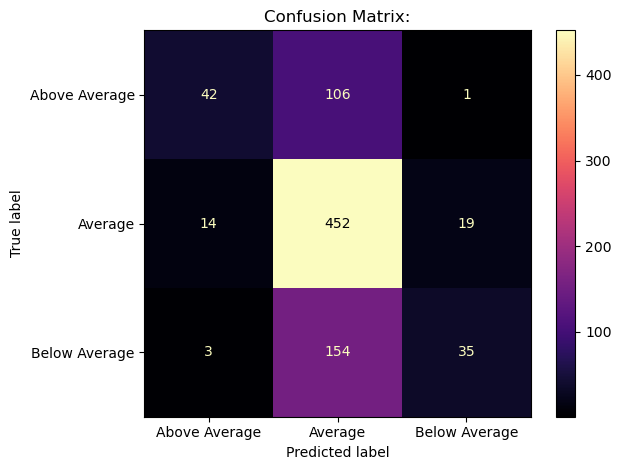

In [1006]:
y_pred = dt_best.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(f"\nThe accurary is: {acc}\n")

cm = confusion_matrix(y_test, y_pred)
print(f"\nThe confusion matrix is:")
print(cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt_best.classes_)
plt.figure(figsize=(18, 15))
disp.plot(cmap='magma')
plt.title("Confusion Matrix:") 
plt.tight_layout()
plt.show()

# Naive Bayes



The accurary is: 0.559322033898305


The confusion matrix is:
[[ 24  97  28]
 [ 32 378  75]
 [ 20 112  60]]


<Figure size 1800x1500 with 0 Axes>

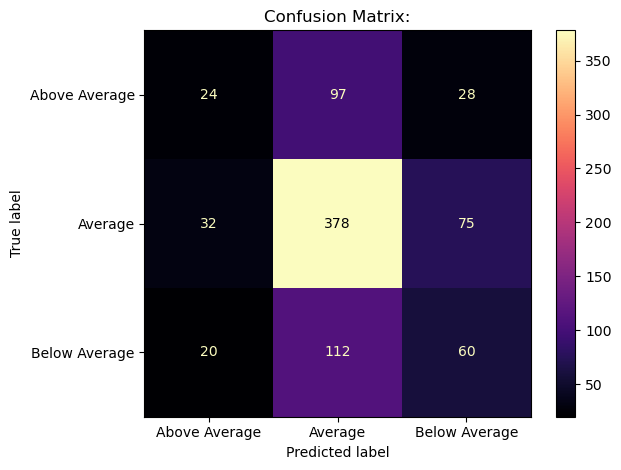

In [1007]:
from sklearn.naive_bayes import MultinomialNB

nb= MultinomialNB()

nb.fit(X_train, y_train)

y_pred= nb.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(f"\nThe accurary is: {acc}\n")

cm = confusion_matrix(y_test, y_pred)
print(f"\nThe confusion matrix is:")
print(cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt_best.classes_)
plt.figure(figsize=(18, 15))
disp.plot(cmap='magma')
plt.title("Confusion Matrix:") 
plt.tight_layout()
plt.show()


The accurary is: 0.5581113801452785


The confusion matrix is:
[[ 24  97  28]
 [ 32 377  76]
 [ 20 112  60]]


C:\Users\luktu\anaconda3\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(


<Figure size 1800x1500 with 0 Axes>

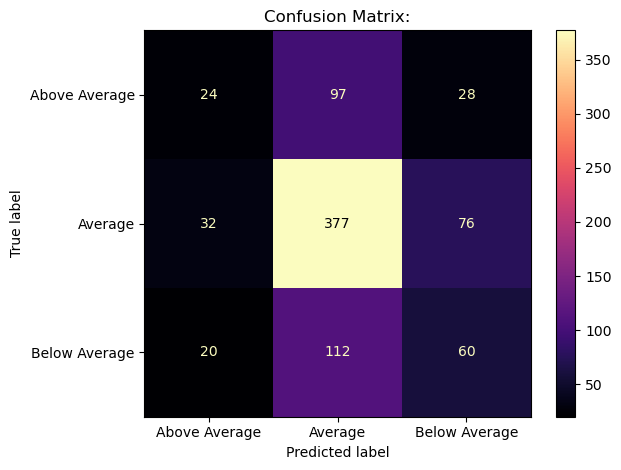

In [1008]:
from sklearn.naive_bayes import MultinomialNB

nb= MultinomialNB(alpha = 0)

nb.fit(X_train, y_train)

y_pred= nb.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(f"\nThe accurary is: {acc}\n")

cm = confusion_matrix(y_test, y_pred)
print(f"\nThe confusion matrix is:")
print(cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt_best.classes_)
plt.figure(figsize=(18, 15))
disp.plot(cmap='magma')
plt.title("Confusion Matrix:") 
plt.tight_layout()
plt.show()


The accurary is: 0.6246973365617433


The confusion matrix is:
[[ 35 114   0]
 [ 24 454   7]
 [  6 159  27]]


<Figure size 1800x1500 with 0 Axes>

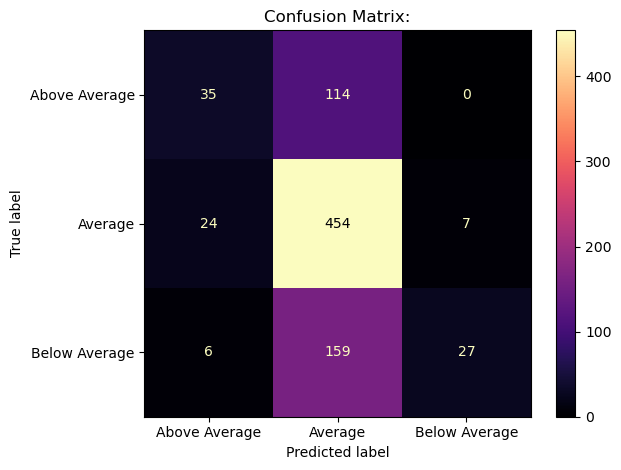

In [1009]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train, y_train)

y_pred = nb.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(f"\nThe accurary is: {acc}\n")

cm = confusion_matrix(y_test, y_pred)
print(f"\nThe confusion matrix is:")
print(cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt_best.classes_)
plt.figure(figsize=(18, 15))
disp.plot(cmap='magma')
plt.title("Confusion Matrix:") 
plt.tight_layout()
plt.show()